# MSDS 422 Assignment 3 - Evaluating Classification Models
by Ruchi Kumar

#### Description: Week 3 Assignment MSDS 422 - Practical Machine Learning

#### Topic: Compete in Titanic: Machine Learning through Disaster project

#### Data Source:  Downloaded from https://www.kaggle.com/c/titanic/data

#### Table of contents:

System and Data Setup

Data Preparation, EDA and Visualization

Modeling Methods

Evaluate Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from statistics import mean

from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import BernoulliNB

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Source data is from: 

train_file = pd.read_csv("train.csv")
test_file = pd.read_csv("test.csv")

In [3]:
# Make a copy of the files

train = train_file.copy()
test = test_file.copy()

In [4]:
# Note that somee columns are int and some are object.  May need to convert

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Null values in Age, Cabin and Embarked
# Cabin is missing a large number.  Drop?
# Embarked can be easily imputed
# What to do with Age?

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Null values in Age, Cabin and Fare

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Approximately 38% of all passengers in training set survived

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# PassengerID will be used for tracking, not as a feature
# Survived is the label
# Pclass - This is ordinal
# Name is not predictive - drop
# Sex - Convert?
# Age - look for less than 1 or xx.5 (estimated)
# SibSp - number of siblings aboard
# Parch - number of parents and or children aboard
# Ticket - drop?
# Fare - does it need a log transformation?
# PassengerId - delete as a feature?
# Maybe combine Parch and SibSp to total relatives?


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Train PassengerId range from 1 - 891

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
# Test PassengerId range from 892-1309

test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


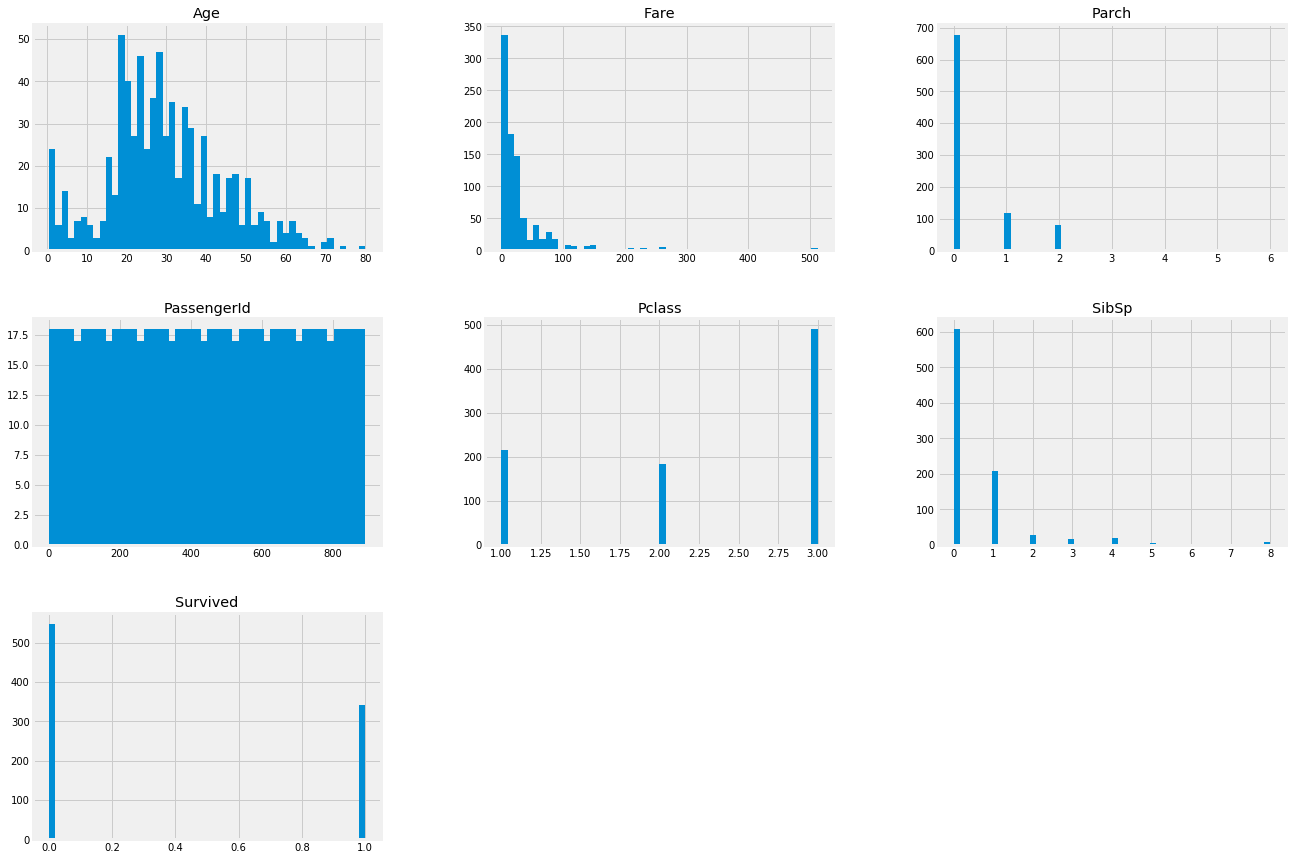

In [15]:
%matplotlib inline   
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

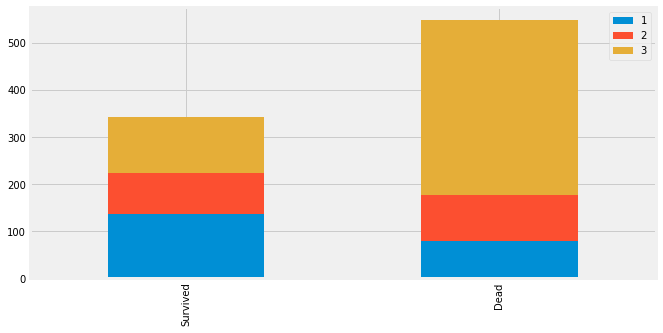

In [17]:
# 1st Class is more likely to survive than die
# While 3rd class is more likely to die than survive

bar_chart('Pclass')

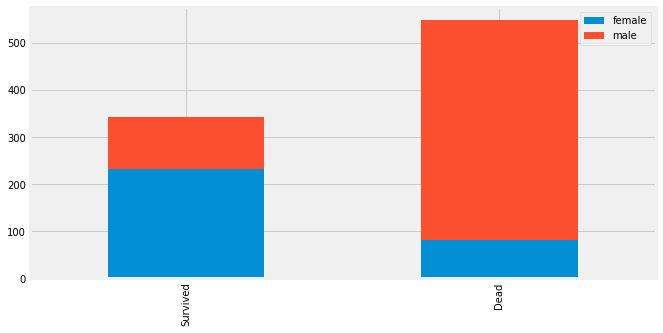

In [18]:
# Females more likely to survive than Males

bar_chart('Sex')

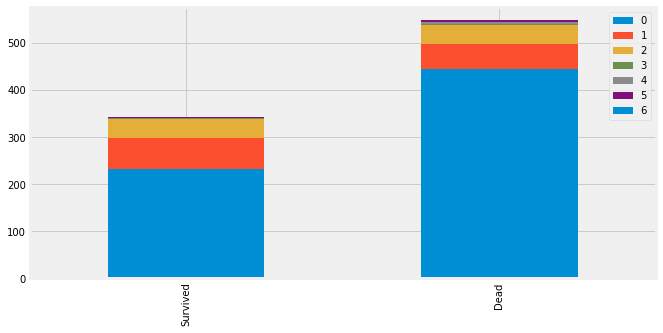

In [19]:
# Difficult to see with this scale, but looks as though larger Parch more likely to die

bar_chart('Parch')

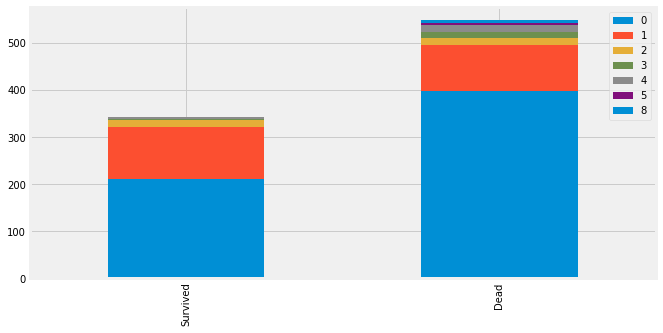

In [20]:
# Similarly, largerr SibSp may be more likely to die

bar_chart('SibSp')

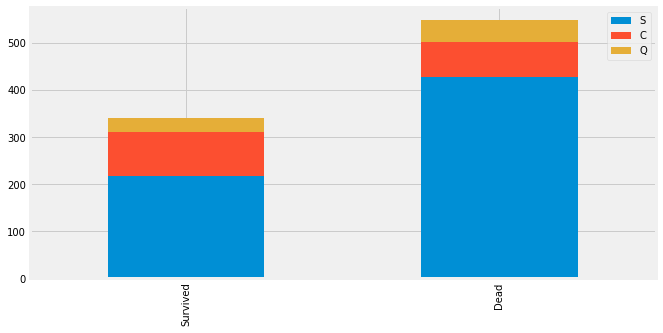

In [21]:
# Some effect of point of embarkation

bar_chart('Embarked')

In [22]:
# Merge test and train files for pre-processing

fullfile = pd.concat([train, test])
fullfile

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [23]:
# Drop Name, Ticket and Cabin

fullfile = fullfile.drop(['Name','Ticket','Cabin'],axis=1)


In [24]:
fullfile.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,1,3,male,1,0.0
1,38.0,C,71.2833,0,2,1,female,1,1.0
2,26.0,S,7.9250,0,3,3,female,0,1.0
3,35.0,S,53.1000,0,4,1,female,1,1.0
4,35.0,S,8.0500,0,5,3,male,0,0.0


In [25]:
fullfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age            1046 non-null float64
Embarked       1307 non-null object
Fare           1308 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 102.3+ KB


In [26]:
# Survived results will be null for test rows.  That is okay

fullfile.isnull().sum()

Age            263
Embarked         2
Fare             1
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64

In [27]:
# Handle nulls for Embarked for both train and test dataframes (deleted Cabin column)

fullfile['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [28]:
common_value = 'S'
data = [fullfile]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [29]:
# Handle nulls for Fare for both train and test dataframes (deleted Cabin column)???
# Don't do yet, not sure what will happen if test set has a null value

In [30]:
# Handle nulls for Age for both train and test dataframes (deleted Cabin column)
# Try imputing using mean for Pclass and Sex

print(train.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median']).round(1))


               mean  median
Sex    Pclass              
female 1       34.6    35.0
       2       28.7    28.0
       3       21.8    21.5
male   1       41.3    40.0
       2       30.7    30.0
       3       26.5    25.0


In [31]:
by_sex_class = fullfile.groupby(['Sex', 'Pclass'])
by_sex_class

In [32]:
def impute_median(series):
    return series.fillna(series.median())

In [33]:
fullfile.Age = by_sex_class['Age'].transform(impute_median)

In [34]:
# Impute nulls for Fare column

fullfile['Fare'] = fullfile['Fare'].fillna(method = 'ffill')

In [35]:
fullfile.isnull().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64

In [36]:
# Convert all remaining features 
# Sex and Embarked are objects
# Fare is a float

fullfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 102.3+ KB


In [37]:
# Convert columns

# Categorical: Survived, Sex, and Embarked
# Ordinal: Pclass
# Continous: Age, Fare 
# Discrete: SibSp, Parch

In [38]:
# Convert Age from Object

fullfile['Sex'] = fullfile['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [39]:
# Convert Fare from float to int

fullfile['Fare'] = fullfile['Fare'].astype(int)

In [40]:
# Convert Embarked to int

ports = {"S": 0, "C": 1, "Q": 2}

fullfile['Embarked'] = fullfile['Embarked'].map(ports)

In [41]:
# Convert Age to int

fullfile["Age"] = fullfile["Age"].astype(int)

In [42]:
fullfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age            1309 non-null int64
Embarked       1309 non-null int64
Fare           1309 non-null int64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
dtypes: float64(1), int64(8)
memory usage: 102.3 KB


In [43]:
corr = fullfile.corr()
corr

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
Age,1.000000,-0.026848,0.199251,-0.134319,0.020307,-0.451984,-0.073683,-0.203730,-0.058514
Embarked,-0.026848,1.000000,0.060169,-0.095523,0.040143,0.038875,0.120423,-0.073461,0.106811
Fare,0.199251,0.060169,1.000000,0.221805,0.030860,-0.559712,0.185668,0.160417,0.257482
Parch,-0.134319,-0.095523,0.221805,1.000000,0.008942,0.018322,0.213125,0.373587,0.081629
PassengerId,0.020307,0.040143,0.030860,0.008942,1.000000,-0.038354,-0.013406,-0.055224,-0.005007
Pclass,-0.451984,0.038875,-0.559712,0.018322,-0.038354,1.000000,-0.124617,0.060832,-0.338481
Sex,-0.073683,0.120423,0.185668,0.213125,-0.013406,-0.124617,1.000000,0.109609,0.543351
SibSp,-0.203730,-0.073461,0.160417,0.373587,-0.055224,0.060832,0.109609,1.000000,-0.035322
Survived,-0.058514,0.106811,0.257482,0.081629,-0.005007,-0.338481,0.543351,-0.035322,1.000000


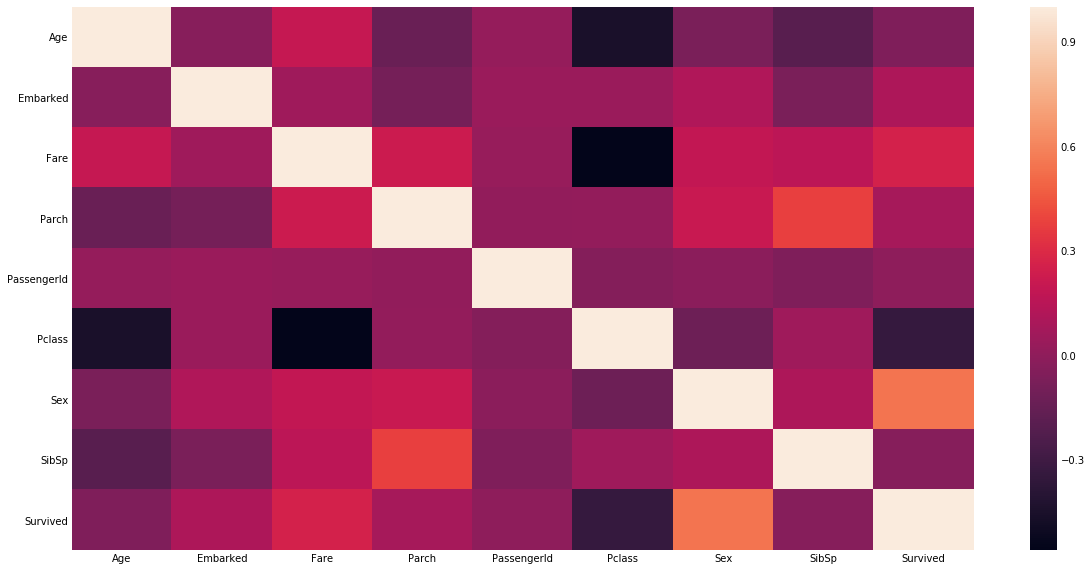

In [44]:
# Normally, would want to eliminate or combine features that are highly correlated, to avoid multicollinearity

fig, ax = plt.subplots(figsize = (18,10))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [45]:
fullfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age            1309 non-null int64
Embarked       1309 non-null int64
Fare           1309 non-null int64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
dtypes: float64(1), int64(8)
memory usage: 102.3 KB


In [46]:
# Keep track of training rows

train_rows = fullfile[0:890]
train_rows

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22,0,7,0,1,3,0,1,0.0
1,38,1,71,0,2,1,1,1,1.0
2,26,0,7,0,3,3,1,0,1.0
3,35,0,53,0,4,1,1,1,1.0
4,35,0,8,0,5,3,0,0,0.0
5,25,2,8,0,6,3,0,0,0.0
6,54,0,51,0,7,1,0,0,0.0
7,2,0,21,1,8,3,0,3,0.0
8,27,0,11,2,9,3,1,0,1.0
9,14,1,30,0,10,2,1,1,1.0


In [47]:
# Keep track of test Rows

test_rows = fullfile[891: ]
test_rows

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,34,2,7,0,892,3,0,0,NaN
1,47,0,7,0,893,3,1,1,NaN
2,62,2,9,0,894,2,0,0,NaN
3,27,0,8,0,895,3,0,0,NaN
4,22,0,12,1,896,3,1,1,NaN
5,14,0,9,0,897,3,0,0,NaN
6,30,2,7,0,898,3,1,0,NaN
7,26,0,29,1,899,2,0,1,NaN
8,18,1,7,0,900,3,1,0,NaN
9,21,0,24,0,901,3,0,2,NaN


In [48]:
# Remove PassengerID Column so I can add it back

# Save ID Columns for submission to Kaggle

fullfile_passengerid = fullfile[['PassengerId']]
train_passengerid = train[['PassengerId']]
test_passengerid = test[['PassengerId']]

In [49]:
# Drop PassengerID Column
# (Add inplace = True to finalize)

fullfile.drop(['PassengerId'], axis=1, inplace = True)

In [50]:
fullfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Age         1309 non-null int64
Embarked    1309 non-null int64
Fare        1309 non-null int64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int64
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(1), int64(7)
memory usage: 92.0 KB


In [51]:
# Remove Survived Column so I can add it back

# Save ID Columns for submission to Kaggle

fullfile_survived = fullfile[['Survived']]
train_survived = train_rows[['Survived']]

In [52]:
# Drop Survived Column
# (Add inplace = True to finalize)

fullfile.drop(['Survived'], axis=1, inplace = True)

In [53]:
fullfile

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22,0,7,0,3,0,1
1,38,1,71,0,1,1,1
2,26,0,7,0,3,1,0
3,35,0,53,0,1,1,1
4,35,0,8,0,3,0,0
5,25,2,8,0,3,0,0
6,54,0,51,0,1,0,0
7,2,0,21,1,3,0,3
8,27,0,11,2,3,1,0
9,14,1,30,0,2,1,1


In [54]:
# Encode and Scale Training Features in Training File

# Define which columns should be encoded vs scaled
columns_to_encode = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
columns_to_scale  = ['Age', 'Fare']

# Instantiate encoder/scaler
scaler = MinMaxScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(fullfile[columns_to_scale]) 
encoded_columns = ohe.fit_transform(fullfile[columns_to_encode])

# Convert to Data Frames
scaled_columns_df = pd.DataFrame(scaled_columns)
encoded_columns_df = pd.DataFrame(encoded_columns)

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = pd.concat([scaled_columns_df, encoded_columns_df], axis=1)

In [55]:
processed_data

,0,1,0,1,2,3,4,5,6,7,...,13,14,15,16,17,18,19,20,21,22
0,0.2750,0.013672,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.4750,0.138672,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.3250,0.013672,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.4375,0.103516,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.4375,0.015625,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.3125,0.015625,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.6750,0.099609,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0250,0.041016,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.3375,0.021484,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.1750,0.058594,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
type(processed_data)

pandas.core.frame.DataFrame

## Modeling Methods and Evaluation

### Organize and Split Data

In [57]:
# Split fullfile into train and test

train_processed = processed_data[0:890]
test_processed = processed_data[891:]

In [58]:
# Rename variables for ease of use in Models:

X = train_processed #numeric training feature without SalePrice (training features)
y = train_survived #Survived values from training file

final_test = test_processed

In [59]:
X

,0,1,0,1,2,3,4,5,6,7,...,13,14,15,16,17,18,19,20,21,22
0,0.2750,0.013672,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.4750,0.138672,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.3250,0.013672,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.4375,0.103516,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.4375,0.015625,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.3125,0.015625,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.6750,0.099609,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0250,0.041016,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.3375,0.021484,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.1750,0.058594,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
5,0.0
6,0.0
7,0.0
8,1.0
9,1.0


In [63]:
# Split training file into train/test set:
from sklearn.model_selection import train_test_split

#Assign variables to capture train test split outcome:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state = 100)

In [64]:
len(final_test)

418

### Logistic Regression

In [65]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
log_accuracy = accuracy_score(y_test, logreg_pred)
log_accuracy

0.7640449438202247

In [66]:
type(final_test)

pandas.core.frame.DataFrame

In [67]:
test_passengerid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
PassengerId    418 non-null int64
dtypes: int64(1)
memory usage: 3.3 KB


In [68]:
# Confusion Matrix

pd.DataFrame(confusion_matrix(y_test,logreg_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,46,9
Survived,12,22


In [69]:
# Additional Reporting

print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81        55
         1.0       0.71      0.65      0.68        34

    accuracy                           0.76        89
   macro avg       0.75      0.74      0.75        89
weighted avg       0.76      0.76      0.76        89



0.8032085561497326


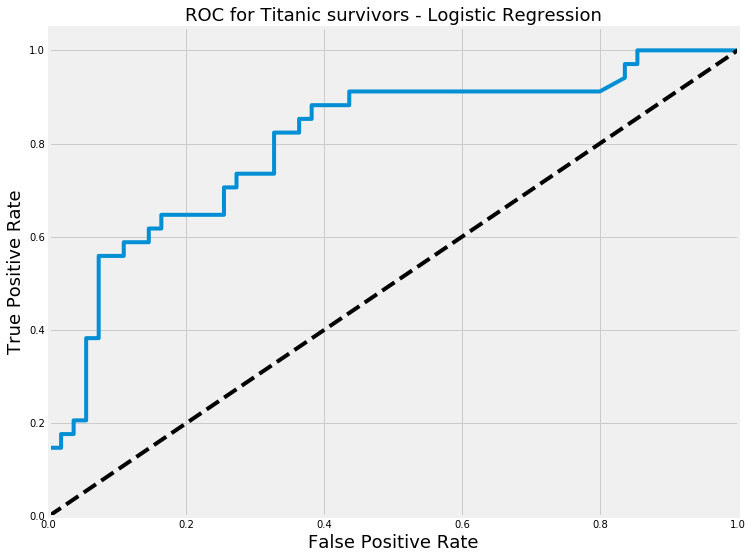

In [70]:
# ROC Curve

# plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors - Logistic Regression', fontsize= 18)
plt.show()

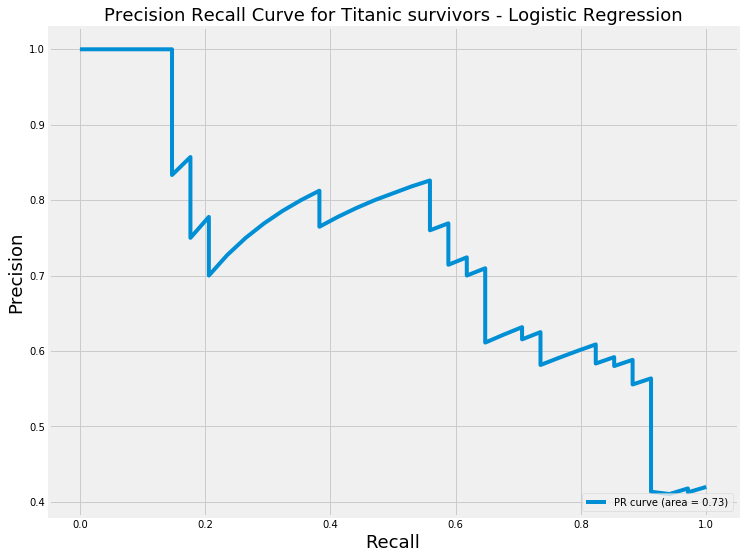

In [71]:
# Precision-Recall Curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors - Logistic Regression', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [72]:
# Use Cross Validation

cv = KFold(n_splits=5, random_state=1, shuffle=True)

#Evaluate model
scores = cross_val_score(logreg, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

#Report performance
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))


Cross-Validation accuracy scores:[0.76966292 0.79213483 0.7752809  0.86516854 0.8258427 ]
Mean Cross-Validation accuracy score: 0.80562


In [73]:
# Improve Results with Grid Search

# C_vals is the alpla value of lasso and ridge regression
# (as alpha increases the model complexity decreases)

## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

## Choosing penalties(Lasso(l1) or Ridge(l2))
# penalties = ['l1','l2']

## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 5, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'C': C_vals}

logreg_grid = LogisticRegression()
## Calling on GridSearchCV object. 
grid = GridSearchCV(
    estimator=LogisticRegression(), 
    param_grid = param,
    scoring = 'roc_auc',
    n_jobs =-1,
    cv = cv
)
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [74]:
# Getting the best parameters 

print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.8602274656255305
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [75]:
# Using the best parameters from the grid-search

logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8134831460674158

In [76]:
logreg_grid_pred = logreg_grid.predict(X_test)
logreg_grid_accuracy = accuracy_score(y_test, logreg_grid_pred)
logreg_grid_accuracy

0.7640449438202247

In [77]:
logreg_grid

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
# Predict Survival of Kaggle Test File

log_y_pred_test = logreg.predict(final_test)

In [79]:
# Need to convert to int

log_y_pred_test = log_y_pred_test.astype(int)

In [80]:
# Prepare Data for Submission to Kaggle

my_submission_log1 = pd.DataFrame({'PassengerId': test_passengerid.PassengerId, 'Survived': log_y_pred_test.flatten()})

my_submission_log1.to_csv('log11_submission.csv', index=False)

In [81]:
# Predict Survival of Kaggle Test File using Grid Search Parameters

logreg_grid_y_pred_test = logreg_grid.predict(final_test)

In [82]:
# Need to convert to int

logreg_grid_y_pred_test = logreg_grid_y_pred_test.astype(int)

In [83]:
# Prepare Data for Submission to Kaggle

my_submission_logreg_grid = pd.DataFrame({'PassengerId': test_passengerid.PassengerId, 'Survived': logreg_grid_y_pred_test.flatten()})

my_submission_logreg_grid.to_csv('logreg_grid_submission.csv', index=False)

### Naive Bayes

In [82]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_accuracy

0.4157303370786517

In [83]:
nb_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [84]:
# Confusion Matrix

pd.DataFrame(confusion_matrix(y_test,nb_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,3,52
Survived,0,34


In [85]:
# Additional Reporting

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.05      0.10        55
         1.0       0.40      1.00      0.57        34

    accuracy                           0.42        89
   macro avg       0.70      0.53      0.34        89
weighted avg       0.77      0.42      0.28        89



In [86]:
# Predict Survival of Kaggle Test File

nb_y_pred_test = nb.predict(final_test)

In [87]:
nb_y_pred_test = nb_y_pred_test.astype(int)

In [88]:
# Prepare Data for Submission to Kaggle

my_submission_nb3 = pd.DataFrame({'PassengerId': test_passengerid.PassengerId, 'Survived': nb_y_pred_test.flatten()})

my_submission_nb3.to_csv('log3_submission.csv', index=False)

### Bernoulli Naive Bayes

In [89]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_accuracy = accuracy_score(y_test, bnb_pred)
bnb_accuracy

0.7303370786516854

In [90]:
# Confusion Matrix

pd.DataFrame(confusion_matrix(y_test,bnb_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,39,16
Survived,8,26


In [91]:
# Additional Reporting

print(classification_report(y_test, bnb_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.76        55
         1.0       0.62      0.76      0.68        34

    accuracy                           0.73        89
   macro avg       0.72      0.74      0.72        89
weighted avg       0.75      0.73      0.73        89



In [92]:
# Predict Survival of Kaggle Test File

bnb_y_pred_test = bnb.predict(final_test)

In [93]:
# Need to convert to int

bnb_y_pred_test = bnb_y_pred_test.astype(int)

In [94]:
# Prepare Data for Submission to Kaggle

my_submission_bnb2 = pd.DataFrame({'PassengerId': test_passengerid.PassengerId, 'Survived': bnb_y_pred_test.flatten()})

my_submission_bnb2.to_csv('log3_submission.csv', index=False)

## Evaluate Models

In [95]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression (Grid Search)', 'Naive Bayes', 'Bernoulli Naive Bayes'],
    'Score': [log_accuracy, logreg_grid_accuracy, nb_accuracy, bnb_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.764045
1,Logistic Regression (Grid Search),0.752809
3,Bernoulli Naive Bayes,0.730337
2,Naive Bayes,0.415730
